In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

from pyspark import SparkContext
import pyspark.sql.functions as F
from pyspark.sql.session import SparkSession

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/Users/fanyang/Documents/musicbox/data/churn_model_0116.csv')

In [3]:
df.head()

Unnamed: 0        uid  total_play  play_percentage  freq_P_last_1  \
0           0  126941437     42975.0         0.620166              0   
1           1  132952490     42539.0         0.783768              0   
2           2  151294213       600.0         0.259291              0   
3           3  163538558       893.0         0.654692              1   
4           4  167328646      3231.0         0.936793              0   

   freq_P_last_3  freq_P_last_7  freq_P_last_14  freq_P_last_21  \
0              0             19              28              29   
1              0              0             121             188   
2              0              0               5               5   
3              1              1               2               4   
4              0              0               0               0   

   freq_P_last_30   ...    freq_S_last_3  freq_S_last_7  freq_S_last_14  \
0             364   ...                0              0               3   
1             263   ...                0              0               2   
2              16   ...                0              0               0   
3               5   ...                0              0               0   
4              11   ...                0              0               0   

   freq_S_last_21  freq_S_last_30  recn_P  recn_D  recn_S  Ischurn  device  
0               4              24       3       0      13        0       1  
1               9              10       8      15       8        0       1  
2               0               0      11       0       0        1       1  
3               0               1       0       0      29        0       1  
4               0               1      27       0      27        1       1  

[5 rows x 27 columns]

In [4]:
df = df.drop(['Unnamed: 0', 'uid'], axis=1)

In [5]:
df.shape

(54638, 25)

In [6]:
df.columns

Index(['total_play', 'play_percentage', 'freq_P_last_1', 'freq_P_last_3',
       'freq_P_last_7', 'freq_P_last_14', 'freq_P_last_21', 'freq_P_last_30',
       'freq_D_last_1', 'freq_D_last_3', 'freq_D_last_7', 'freq_D_last_14',
       'freq_D_last_21', 'freq_D_last_30', 'freq_S_last_1', 'freq_S_last_3',
       'freq_S_last_7', 'freq_S_last_14', 'freq_S_last_21', 'freq_S_last_30',
       'recn_P', 'recn_D', 'recn_S', 'Ischurn', 'device'],
      dtype='object')

In [7]:
# re-arrage order of dataframe

df = df[['Ischurn','total_play', 'play_percentage','device',
        'freq_P_last_1', 'freq_P_last_3',
       'freq_P_last_7', 'freq_P_last_14', 'freq_P_last_21', 'freq_P_last_30',
       'freq_D_last_1', 'freq_D_last_3', 'freq_D_last_7', 'freq_D_last_14',
       'freq_D_last_21', 'freq_D_last_30', 'freq_S_last_1', 'freq_S_last_3',
       'freq_S_last_7', 'freq_S_last_14', 'freq_S_last_21', 'freq_S_last_30',
       'recn_P', 'recn_D', 'recn_S']]

In [8]:
df.describe()

Ischurn     total_play  play_percentage       device  \
count  54638.000000   54638.000000     54638.000000  54638.00000   
mean       0.611589   20988.457631         3.358492      0.87441   
std        0.487393   57042.250407        46.002875      0.33139   
min        0.000000       0.000000         0.000000      0.00000   
25%        0.000000     568.000000         0.440933      1.00000   
50%        1.000000    3445.000000         0.678112      1.00000   
75%        1.000000   16590.750000         0.845773      1.00000   
max        1.000000  975716.000000       999.811189      1.00000   

       freq_P_last_1  freq_P_last_3  freq_P_last_7  freq_P_last_14  \
count   54638.000000   54638.000000   54638.000000    54638.000000   
mean        3.530162      11.057542      24.864124       54.263461   
std        16.415221      40.176328      77.385862      147.537213   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000        0.000000   
50%         0.000000       0.000000       0.000000        0.000000   
75%         0.000000       0.000000      10.000000       37.000000   
max       994.000000    1281.000000    2128.000000     3764.000000   

       freq_P_last_21  freq_P_last_30      ...       freq_D_last_30  \
count    54638.000000    54638.000000      ...         54638.000000   
mean        84.967330      148.323145      ...             9.651067   
std        208.621542      299.557254      ...            57.113638   
min          0.000000        1.000000      ...             0.000000   
25%          0.000000       10.000000      ...             0.000000   
50%          5.000000       38.000000      ...             0.000000   
75%         72.000000      149.000000      ...             3.000000   
max       4375.000000     4375.000000      ...          6427.000000   

       freq_S_last_1  freq_S_last_3  freq_S_last_7  freq_S_last_14  \
count   54638.000000   54638.000000   54638.000000    54638.000000   
mean        0.157875       0.374154       1.214301        2.976701   
std         1.687396       2.416769       5.276240       10.619709   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.000000        0.000000   
50%         0.000000       0.000000       0.000000        0.000000   
75%         0.000000       0.000000       0.000000        1.000000   
max       164.000000     164.000000     339.000000      506.000000   

       freq_S_last_21  freq_S_last_30        recn_P        recn_D  \
count    54638.000000    54638.000000  54638.000000  54638.000000   
mean         4.978001       11.078297     14.913137      7.003752   
std         15.904079       27.565552     11.466747     10.743581   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      3.000000      0.000000   
50%          0.000000        2.000000     15.000000      0.000000   
75%          3.000000       11.000000     27.000000     14.000000   
max        587.000000     1221.000000     29.000000     29.000000   

             recn_S  
count  54638.000000  
mean       9.474450  
std       11.363322  
min        0.000000  
25%        0.000000  
50%        3.000000  
75%       20.000000  
max       29.000000  

[8 rows x 25 columns]

Text(0,0.5,'counts')

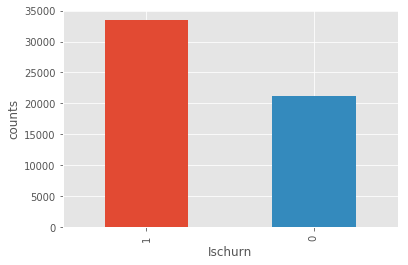

In [9]:
df['Ischurn'].value_counts().plot(kind='bar')
plt.xlabel('Ischurn')
plt.ylabel('counts')

In [10]:
y = df['Ischurn']
X = df.drop('Ischurn', axis=1)

In [11]:
for i in enumerate(X.columns):
    print(i)

(0, 'total_play')
(1, 'play_percentage')
(2, 'device')
(3, 'freq_P_last_1')
(4, 'freq_P_last_3')
(5, 'freq_P_last_7')
(6, 'freq_P_last_14')
(7, 'freq_P_last_21')
(8, 'freq_P_last_30')
(9, 'freq_D_last_1')
(10, 'freq_D_last_3')
(11, 'freq_D_last_7')
(12, 'freq_D_last_14')
(13, 'freq_D_last_21')
(14, 'freq_D_last_30')
(15, 'freq_S_last_1')
(16, 'freq_S_last_3')
(17, 'freq_S_last_7')
(18, 'freq_S_last_14')
(19, 'freq_S_last_21')
(20, 'freq_S_last_30')
(21, 'recn_P')
(22, 'recn_D')
(23, 'recn_S')


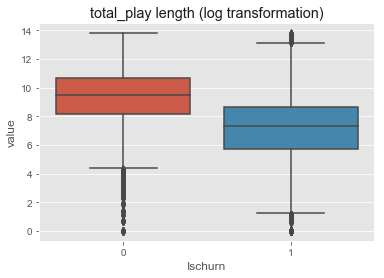

<Figure size 1080x720 with 0 Axes>

In [12]:
df_total_play = pd.concat([y, np.log(X.iloc[:,0])], axis=1)
df_total_play = pd.melt(df_total_play, id_vars="Ischurn",
              var_name="total_play",
              value_name="value")
sns.boxplot(x="Ischurn", y="value", data=df_total_play).set_title('total_play length (log transformation)')

plt.figure(figsize=(15,10))
sns.set(font_scale=1)

In [ ]:
#df_7 = pd.concat([y, np.log(X.iloc[:,1])], axis=1)
#df_7 = pd.melt(df_7, id_vars="Ischurn",
#              var_name="total_play",
#              value_name="value")
#ax=sns.boxplot(x="Ischurn", y="value", data=df_7).set_title('play_percentage between churn and active users (log transformation)')
#plt.figure(figsize=(5,10))
#sns.set(font_scale=1)

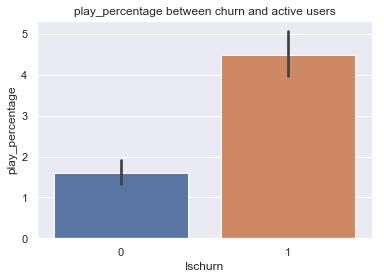

In [21]:
df_play_pct = pd.concat([y, (X.iloc[:,1])], axis=1)
sns.barplot(x="Ischurn", y="play_percentage", data=df_play_pct).set_title('play_percentage between churn and active users')
sns.set(font_scale=1)

No handles with labels found to put in legend.


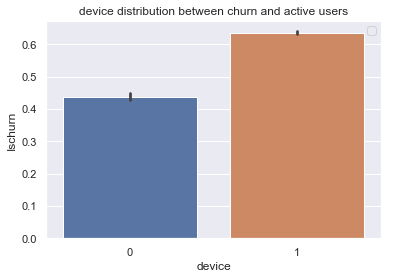

In [22]:
df_device = pd.concat([y, (X.iloc[:,2])], axis=1)
sns.barplot(y="Ischurn", x="device", data=df_device).set_title('device distribution between churn and active users')
sns.set(font_scale=1)
plt.legend()


#### 0 stands for 'mac' and 'ip', 1 stands for 'ar'

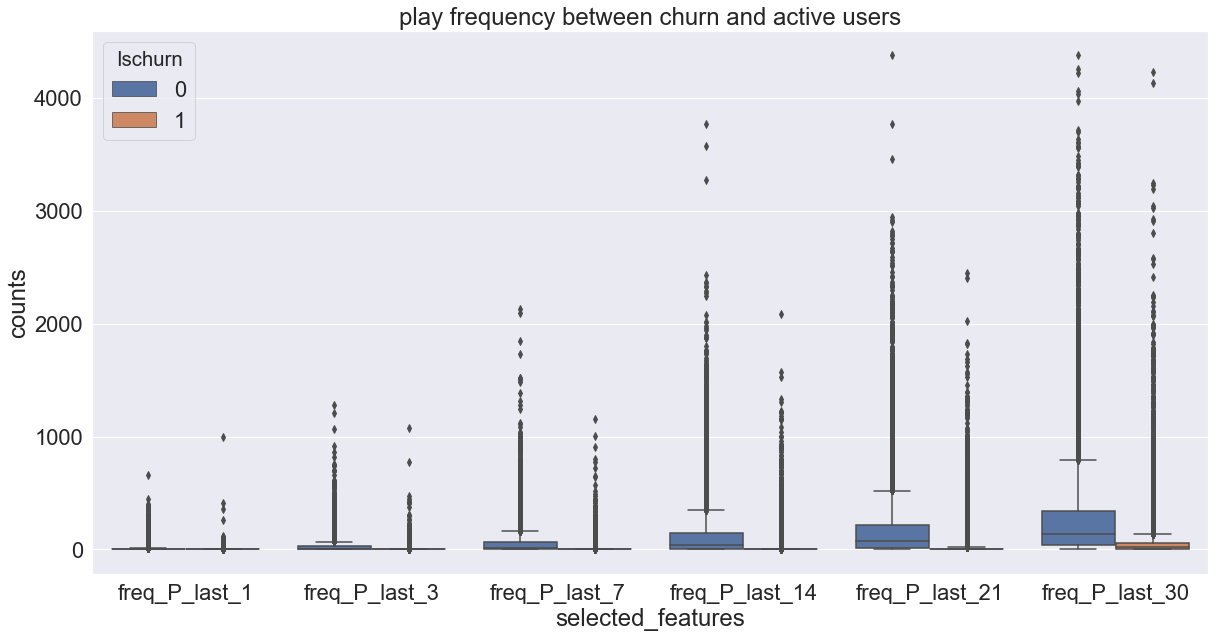

In [24]:
import seaborn as sns
df_p = pd.concat([y, X.iloc[:,3:9]], axis=1)
df_p = pd.melt(df_p, id_vars="Ischurn",
              var_name="selected_features",
              value_name="counts")
plt.figure(figsize=(20,10))
sns.boxplot(x="selected_features", y="counts", hue="Ischurn", data=df_p).set_title('play frequency between churn and active users')
sns.set(font_scale=2)

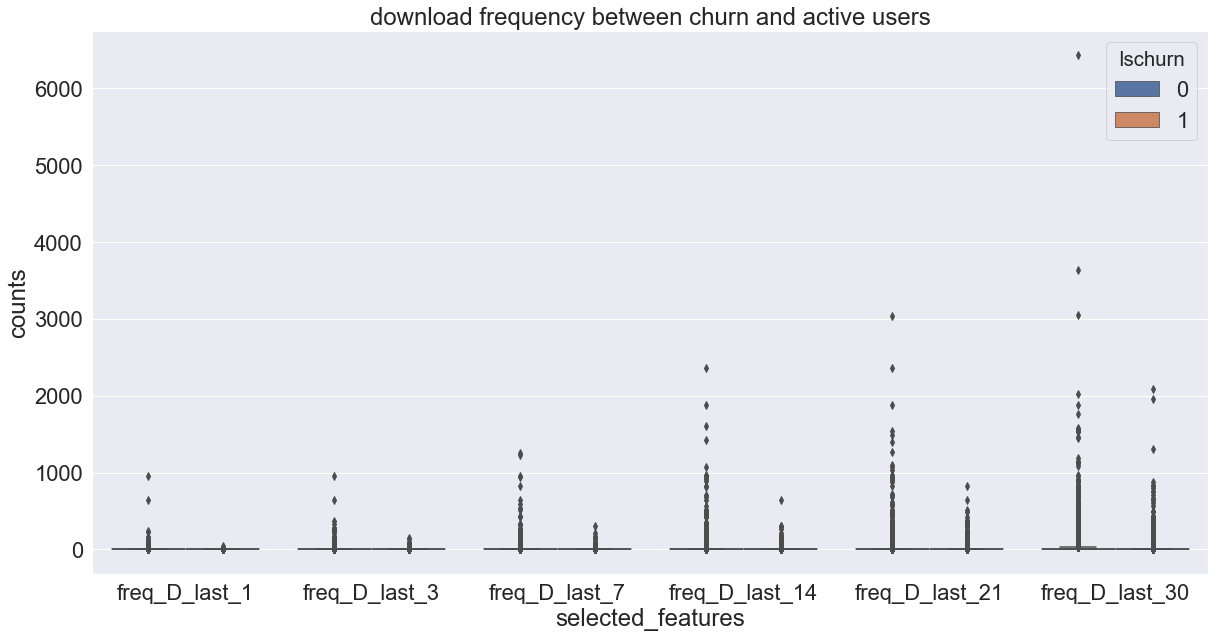

In [25]:
df_d = pd.concat([y, X.iloc[:,9:15]], axis=1)
df_d = pd.melt(df_d, id_vars="Ischurn",
              var_name="selected_features",
              value_name="counts")
plt.figure(figsize=(20,10))
sns.boxplot(x="selected_features", y="counts", hue="Ischurn", data=df_d).set_title('download frequency between churn and active users')
sns.set(font_scale=3)

In [ ]:
#df_2b = pd.concat([y, np.log(X.iloc[:,8:14])], axis=1)
#df_2b = pd.melt(df_2b, id_vars="Ischurn",
#              var_name="selected_features",
#              value_name="counts")
#plt.figure(figsize=(20,10))
#sns.boxplot(x="selected_features", y="counts", hue="Ischurn", data=df_2b).set_title('download frequency between churn and active users (log transformion)')
#sns.set(font_scale=1)

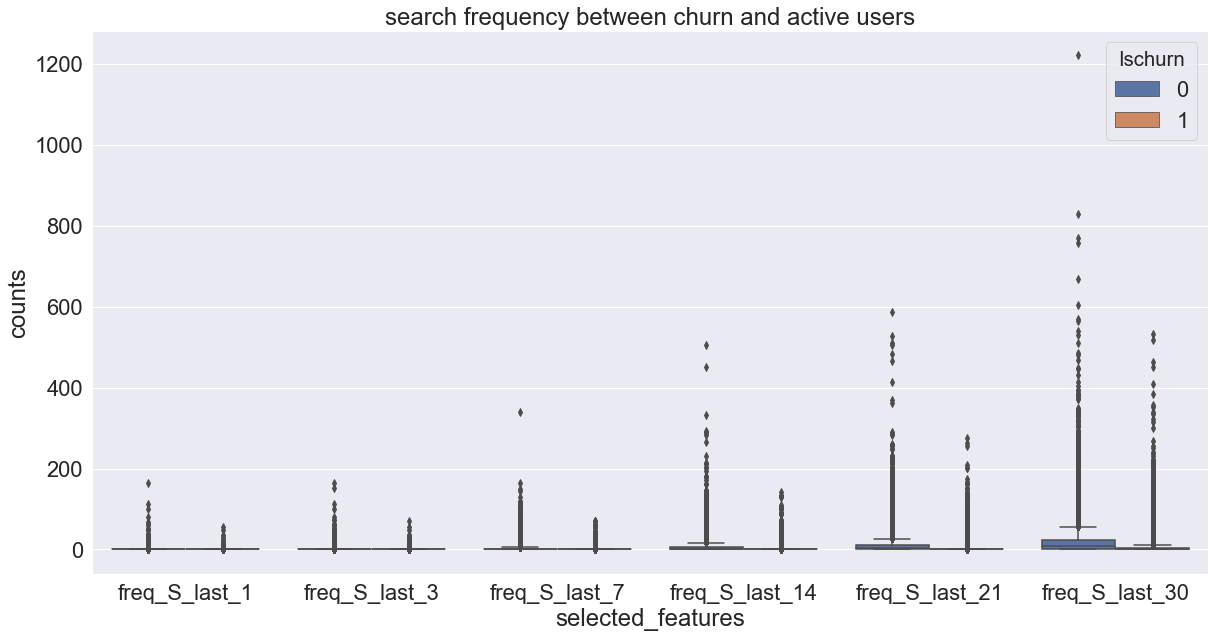

In [29]:
df_s = pd.concat([y, X.iloc[:,15:21]], axis=1)
df_s = pd.melt(df_s, id_vars="Ischurn",
              var_name="selected_features",
              value_name="counts")
plt.figure(figsize=(20,10))
sns.boxplot(x="selected_features", y="counts", hue="Ischurn", data=df_s).set_title('search frequency between churn and active users')
sns.set(font_scale=2)

In [ ]:
#df_3b = pd.concat([y, np.log(X.iloc[:,14:20])], axis=1)
#df_3b = pd.melt(df_3b, id_vars="Ischurn",
#              var_name="selected_features",
#              value_name="counts")
#plt.figure(figsize=(20,10))
#sns.boxplot(x="selected_features", y="counts", hue="Ischurn", data=df_3b).set_title('search frequency between churn and active users (log transformion)')
#sns.set(font_scale=3)

In [ ]:
#df_5 = pd.concat([y, X.iloc[:,0]], axis=1)
#df_5 = pd.melt(df_5, id_vars="Ischurn",
#              var_name="total_play",
#              value_name="value")
#ax=sns.boxplot(x="Ischurn", y="value", data=df_5).set_title('total_play length(original)')
#plt.figure(figsize=(5,10))
#sns.set(font_scale=1)

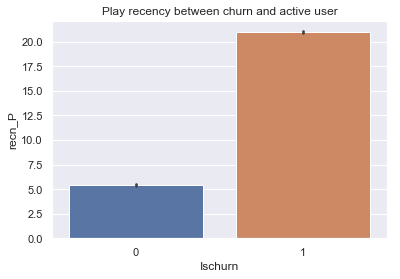

In [37]:
df_rP = pd.concat([y, (X.iloc[:,21])], axis=1)
sns.barplot(x="Ischurn", y="recn_P", data=df_rP).set_title('Play recency between churn and active user')
sns.set(font_scale=1)

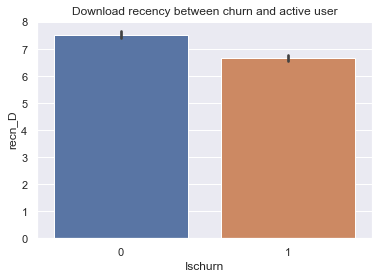

In [35]:
df_rD = pd.concat([y, (X.iloc[:,22])], axis=1)
sns.barplot(x="Ischurn", y="recn_D", data=df_rD).set_title('Download recency between churn and active user')
sns.set(font_scale=1)

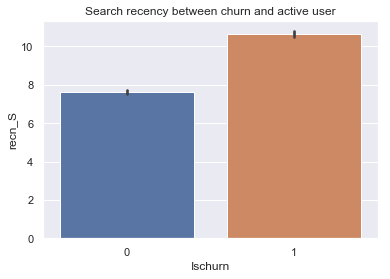

In [36]:
df_rS = pd.concat([y, (X.iloc[:,23])], axis=1)
sns.barplot(x="Ischurn", y="recn_S", data=df_rS).set_title('Search recency between churn and active user')
sns.set(font_scale=1)

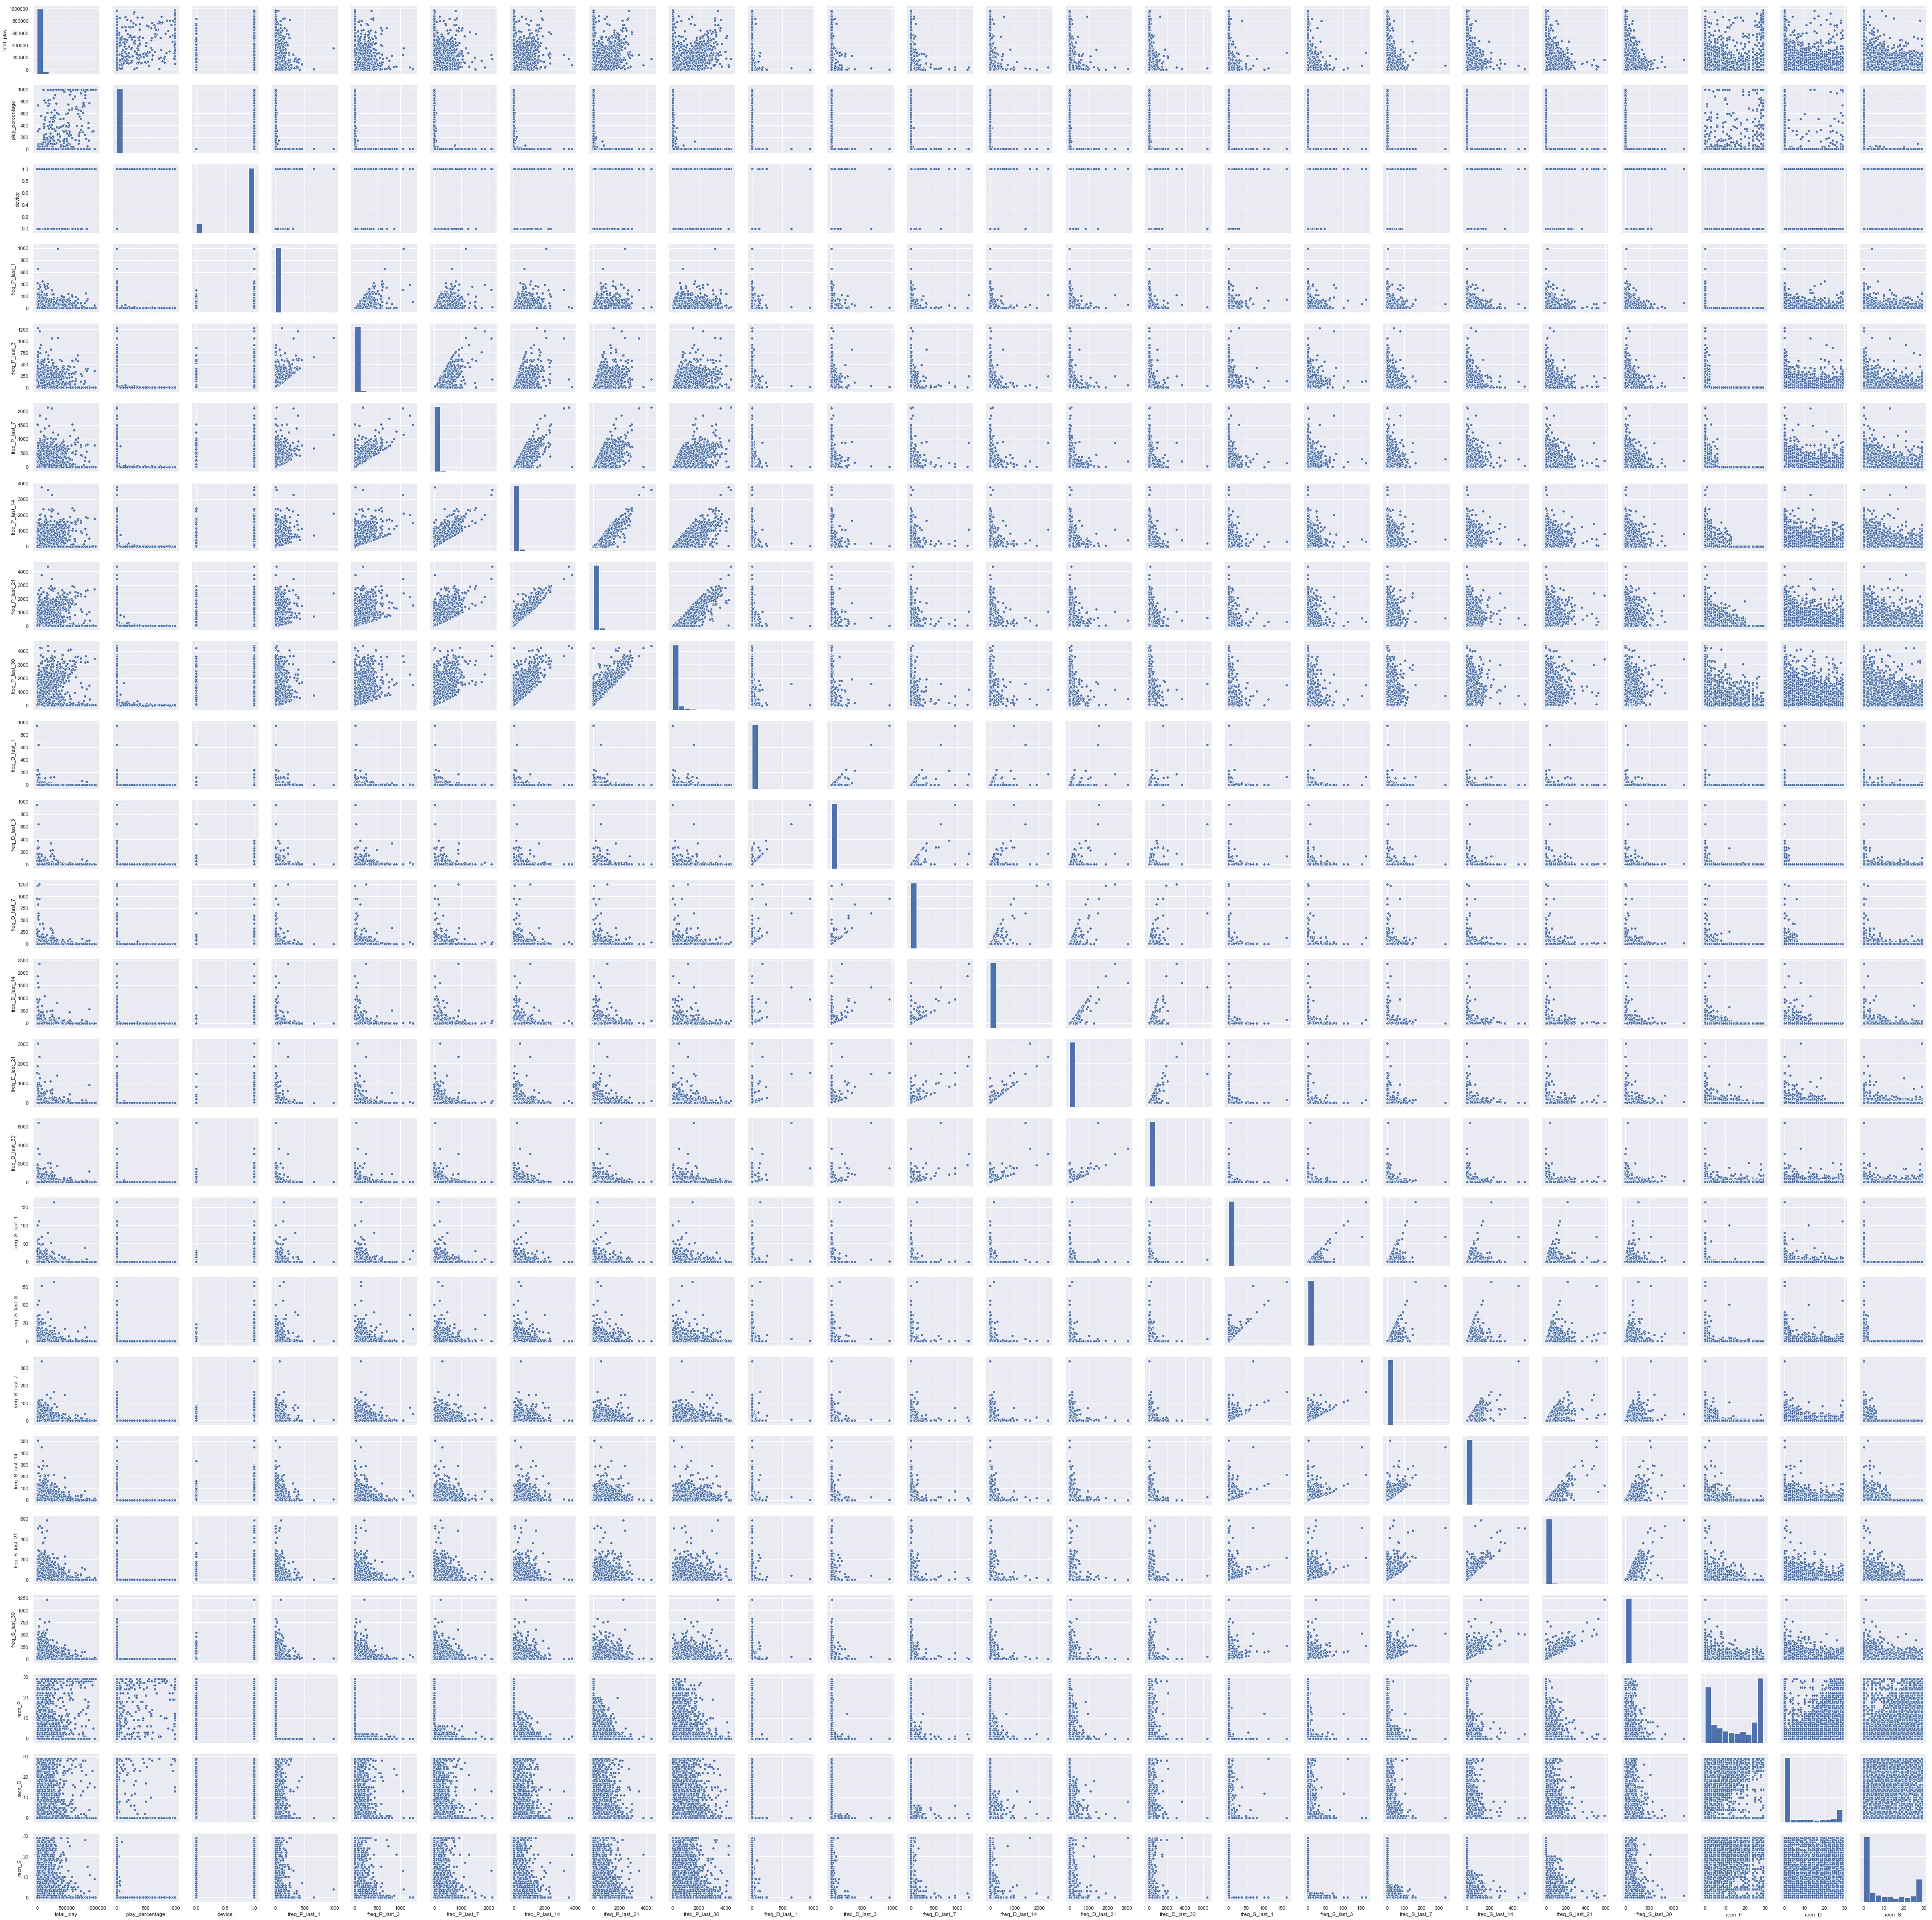

In [38]:
sns.pairplot(df.iloc[:,1:], kind="scatter")
plt.show()

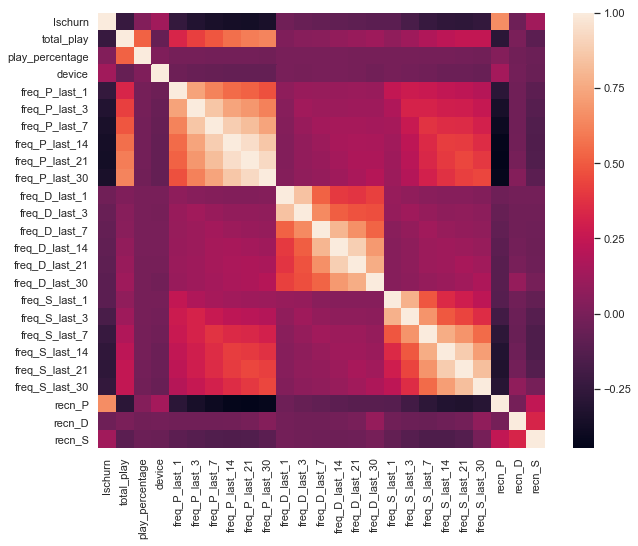

In [39]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr)
plt.show()

In [40]:
corr['Ischurn'].sort_values(ascending = False).to_frame('corr_value').reset_index()

index  corr_value
0           Ischurn    1.000000
1            recn_P    0.660198
2            device    0.135269
3            recn_S    0.130623
4   play_percentage    0.030604
5     freq_D_last_1   -0.031082
6            recn_D   -0.039212
7     freq_D_last_3   -0.057987
8     freq_D_last_7   -0.069873
9    freq_D_last_14   -0.083987
10   freq_D_last_21   -0.095234
11    freq_S_last_1   -0.102361
12   freq_D_last_30   -0.103382
13    freq_S_last_3   -0.167295
14       total_play   -0.233646
15    freq_S_last_7   -0.234391
16    freq_P_last_1   -0.247696
17   freq_S_last_30   -0.253753
18   freq_S_last_14   -0.262778
19   freq_S_last_21   -0.270565
20    freq_P_last_3   -0.311141
21    freq_P_last_7   -0.347481
22   freq_P_last_30   -0.348528
23   freq_P_last_14   -0.363895
24   freq_P_last_21   -0.368557

In [43]:
def find_high_correlated_features(frame):
    new_corr = frame.corr()
    new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
    new_corr = new_corr.stack()
    print(new_corr[(new_corr > 0.3) | (new_corr < -0.3)])
    
find_high_correlated_features(df)

play_percentage  total_play        0.520387
freq_P_last_1    total_play        0.327997
freq_P_last_3    Ischurn          -0.311141
                 total_play        0.418862
                 freq_P_last_1     0.734440
freq_P_last_7    Ischurn          -0.347481
                 total_play        0.490876
                 freq_P_last_1     0.624881
                 freq_P_last_3     0.855037
freq_P_last_14   Ischurn          -0.363895
                 total_play        0.562290
                 freq_P_last_1     0.552859
                 freq_P_last_3     0.738902
                 freq_P_last_7     0.886889
freq_P_last_21   Ischurn          -0.368557
                 total_play        0.608458
                 freq_P_last_1     0.524373
                 freq_P_last_3     0.690736
                 freq_P_last_7     0.825622
                 freq_P_last_14    0.948414
freq_P_last_30   Ischurn          -0.348528
                 total_play        0.628863
                 freq_P_last_1  